In [1]:
%pylab inline

import sys
sys.path.append('/Users/praveen/anaconda/lib/python2.7/site-packages')

import rlcompleter, readline
readline.parse_and_bind('tab: complete')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk, re, pprint


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data/listings.csv')
data['price'] = data['price'].apply(lambda x:float(x.strip('$').replace(',','')))
price_num = data[['price','reviews_per_month']]
price_score = data[['price','review_scores_rating']]
price_commu = data[['price','review_scores_communication']]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [6]:
place_description  = data[['description']]
host_description = data[['host_about']].sample(n=100)
host_description = host_description.fillna("empty")
price_score['review_scores_rating'] = price_score['review_scores_rating'].fillna(0)
info_host_desciption=[]
corresponding_rating = []

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
print len(host_description)

100


In [8]:
def ie_preprocess(document):

    if document is "empty":
        return 0
    else:
        info=0
        sentences = nltk.sent_tokenize(document)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
        for tuples in sentences:
            for token,pos in tuples:
                if pos.startswith('N') or pos.startswith('J'):
                    info+=1
        return info

In [9]:
for index, row in host_description.iterrows():
    info_host_desciption.append(ie_preprocess(host_description.loc[index]['host_about'].decode("utf8")))
    corresponding_rating.append(price_score['review_scores_rating'][index])

In [10]:
print len(corresponding_rating)
print len(info_host_desciption)

100
100


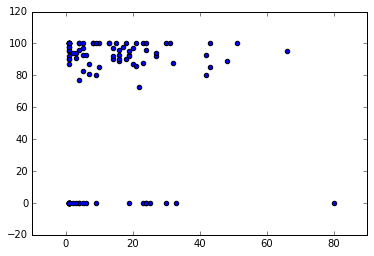

In [11]:
plt.scatter(info_host_desciption, corresponding_rating[:100])

In [12]:
number_of_rating=[]
for index, row in host_description.iterrows():
    number_of_rating.append(data['number_of_reviews'][index])

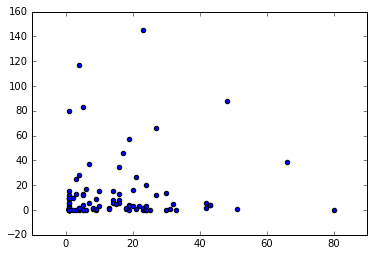

In [13]:
plt.scatter(info_host_desciption, number_of_rating)

In [14]:
from bokeh.plotting import figure, output_notebook, show, vplot

In [15]:
output_notebook()

BokehJS successfully loaded.

In [21]:
corresponding_rating = [int(c) for c in corresponding_rating]
df = pd.DataFrame({ 'Score': corresponding_rating,
                    'Number': number_of_rating,
                    'info': info_host_desciption
    })


In [22]:
df = df[df['info'] <=50]
print df

    Number  Score  info
0        6     93    42
1       12     92    27
2        0      0     4
3        0      0     1
4        1    100     1
5        0      0     1
6        1      0     1
7       15     95     1
8       13     83     5
9        0      0     1
10      20     96    24
11       8     90    14
12       0      0    24
13       1      0     4
14       0      0     1
15       6     97    14
16       0      0     1
17       8     93    16
18       4    100    43
19      46     98    17
20       2    100     4
21       1    100     8
22       1    100    31
23       4     95    19
24       2    100    13
25       2    100     1
26       3     87    20
27      28     96     4
28       3    100    10
29      35     89    16
..     ...    ...   ...
68       0      0     1
69       5    100    15
70       6     87     1
71       3    100     1
72      13     91     3
73      27     86    21
74      17     93     6
75       0      0     1
76       0      0    30
77      13     9

In [31]:
df2 = df[['info','Number']].groupby(['info','Number']).size().reset_index(name='freq')

In [32]:
df3 = df[['info','Score']].groupby(['info','Score']).size().reset_index(name='freq_s')

In [34]:
print df2
keys = df2.groupby(['info']).size().reset_index(name='freq')
keys_score = df3.groupby(['info']).size().reset_index(name='freq_s')

    info  Number  freq
0      1       0    10
1      1       1     6
2      1       2     3
3      1       3     1
4      1       6     2
5      1       9     1
6      1      10     2
7      1      12     1
8      1      15     1
9      1      80     1
10     2       0     1
11     2      10     1
12     3       0     1
13     3      13     1
14     3      25     1
15     4       0     1
16     4       1     1
17     4       2     2
18     4      28     1
19     4     117     1
20     5       0     1
21     5       4     1
22     5      12     1
23     5      13     1
24     5      83     1
25     6       0     1
26     6      17     1
27     7       6     1
28     7      37     1
29     8       1     1
..   ...     ...   ...
46    17      46     1
47    18       1     1
48    18       2     1
49    19       0     1
50    19       3     1
51    19       4     1
52    19      57     1
53    20       3     1
54    20      16     1
55    21       1     1
56    21      27     1
57    22   

In [35]:
keys= keys[:5]
keys_score = keys_score[:5]
print keys_score

   info  freq_s
0     1       8
1     2       2
2     3       3
3     4       4
4     5       5


In [38]:
p = figure(width=500, height=500, title="Effect of Host Desciption on Reviews")
p.circle(df2['info'], df2['Number'], size=9, color="firebrick", alpha=0.5)
p.triangle(x=df3['info'], y=df3['Score'], size=9, color="green", alpha=0.5)
show(p)